In [18]:
library(ggplot2)
library(openxlsx)
library(VennDiagram)
library(RColorBrewer)

In [20]:
#GR-meQTLs
meqtls = fread("../Tables/S2_GRmeQTLs.txt", data.table = F)
dim(meqtls)

#GR-eQTLs
eqtls = fread("data/GReQTLs.txt", data.table = F)
dim(eqtls)#10398

#GR-eQTMs
eqtms = read.xlsx("../Tables/S4_GReqtm.xlsx")
dim(eqtms)

[1] 104828     12

[1] 10398    18

[1] 28688    12

## Panel A - Venn diagram (GR-meQTLs vs. GR-eQTLs)

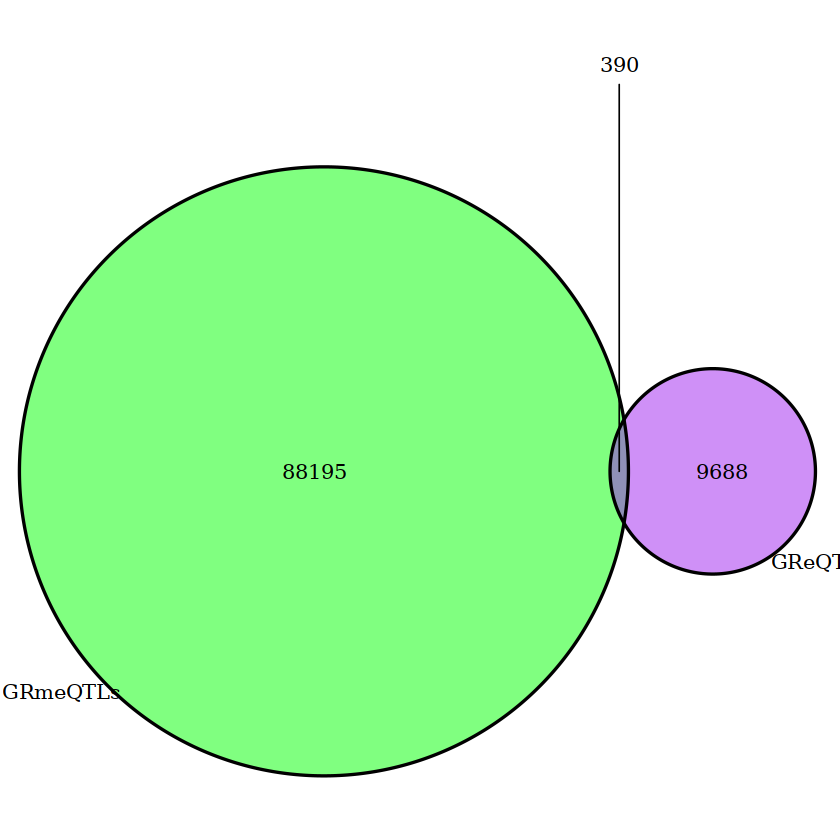

In [6]:
set_colors <- c("purple","green")
sets <- list(GReQTLs = eqtls$SNP, GRmeQTLs = meqtls$SNP)
venn_eqtl=venn.diagram(sets, filename = NULL,scaled = TRUE, scaling.area = TRUE, fill = set_colors, alpha = 0.5, lwd = 2)
grid.newpage()
grid.draw(venn_eqtl)

## Panel B - Venn diagram (GR-meQTLs vs. GR-eQTMs)

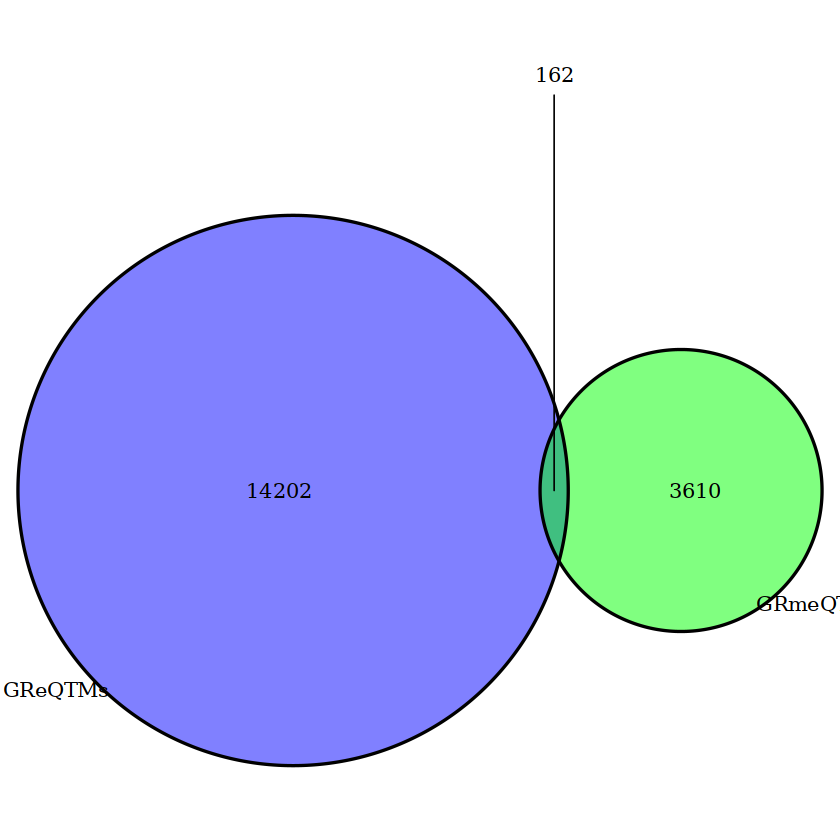

In [31]:
set_colors <- c( "green","blue")
sets <- list( GRmeQTLs = meqtls$CpG, GReQTMs = eqtms$CpG)
venn_eqtm=venn.diagram(sets, filename = NULL,scaled = TRUE, scaling.area = TRUE, fill = set_colors, alpha = 0.5, lwd = 2)
grid.newpage()
grid.draw(venn_eqtm)

## Panel C - Pie Chart

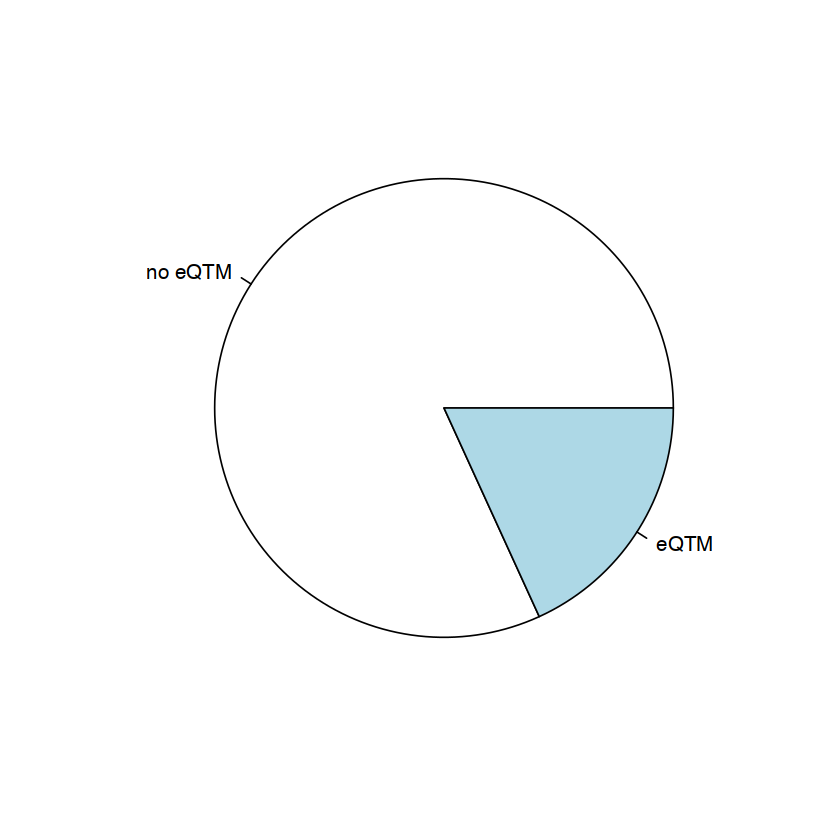

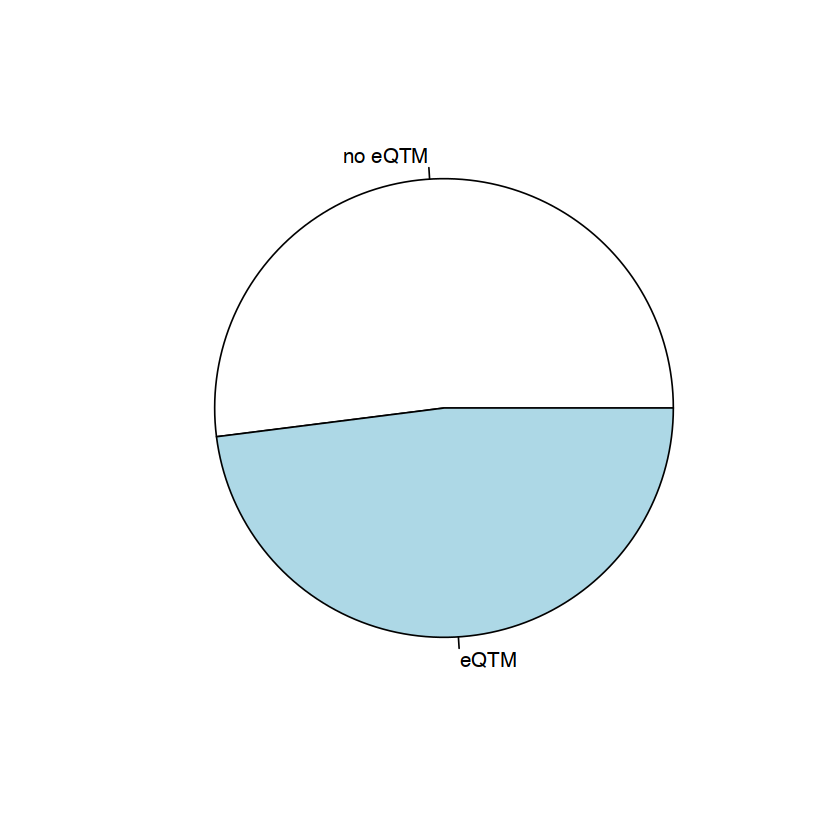

In [35]:
#eQTM CpGs
x <- c(27, 6)
labels <- c("no eQTM", "eQTM")
pie(x,labels)

x <- c(13, 12)
labels <- c("no eQTM", "eQTM")
pie(x,labels)

## Panel D-E- Box plot

In [45]:
plotData = readRDS("data/clec4c_qtl_data.rds")

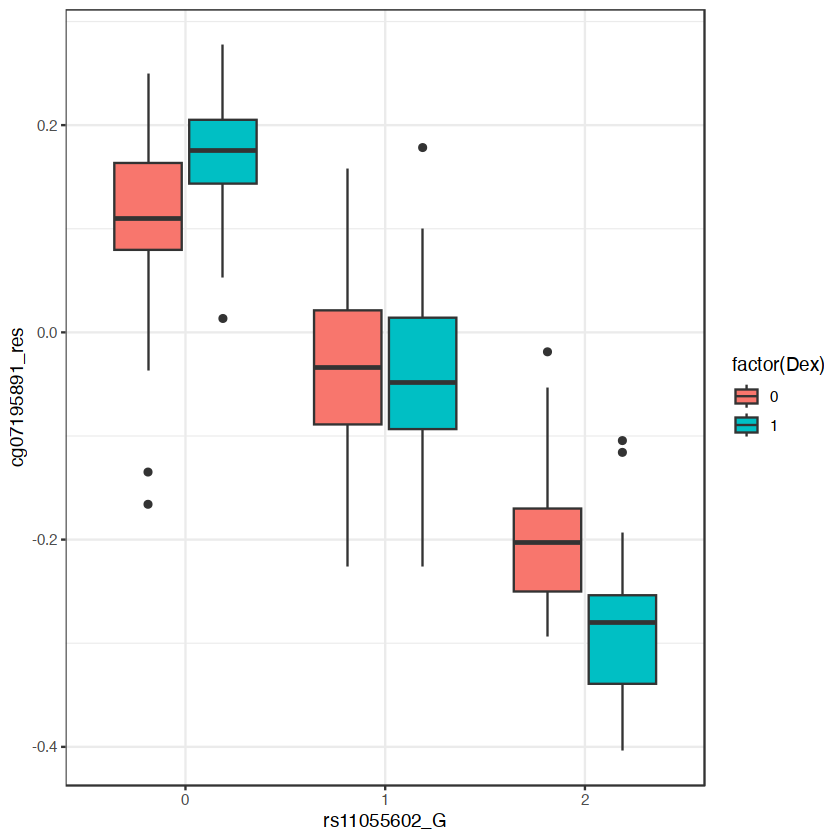

In [46]:
#1 boxplots for meQTL
p <- ggplot(plotData, aes(factor(rs11055602_G), cg07195891_res)) + xlab("rs11055602_G")
p + geom_boxplot(aes(fill = factor(Dex))) +theme_bw()

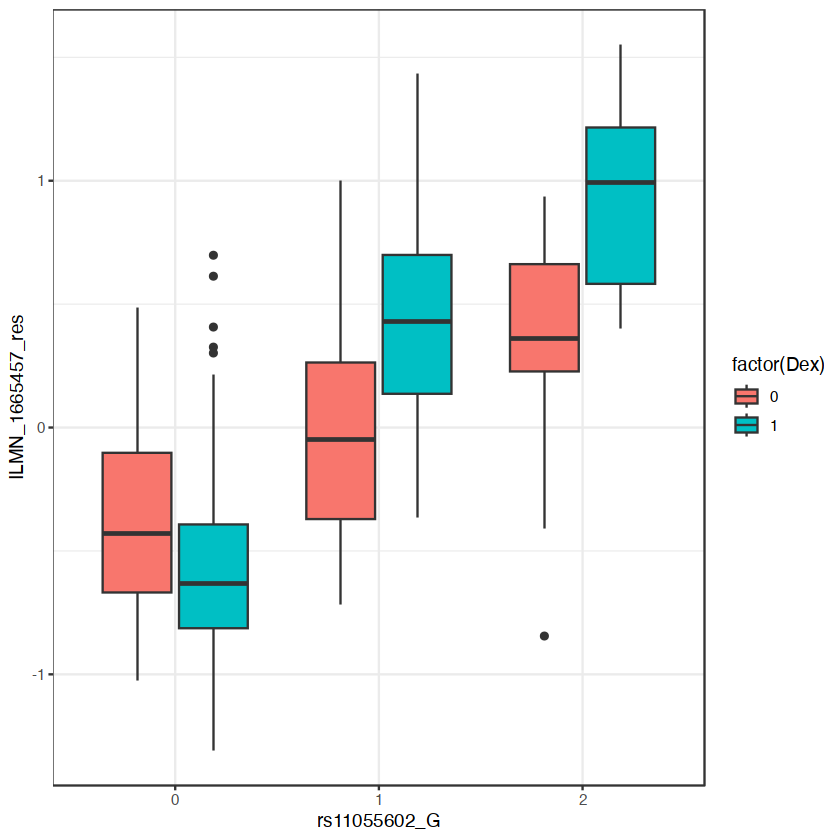

In [47]:
#2 boxplots for eQTL
p <- ggplot(plotData, aes(factor(rs11055602_G), ILMN_1665457_res)) + xlab("rs11055602_G")
p + geom_boxplot(aes(fill = factor(Dex))) +theme_bw()

## Panel F-G - Scatterplot

`geom_smooth()` using formula = 'y ~ x'


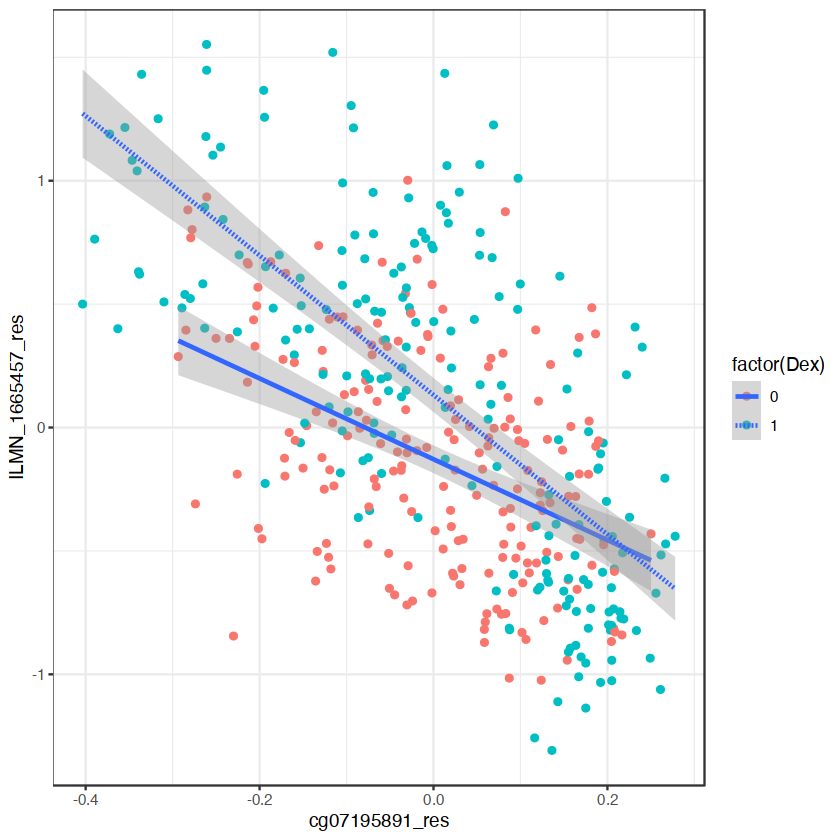

In [48]:
#scatterplot for eQTM
p <- ggplot(plotData, aes( cg07195891_res, ILMN_1665457_res, linetype = factor(Dex)))
p + geom_point(aes(colour = factor(Dex)))+stat_smooth(method = "lm") +theme_bw()

`geom_smooth()` using formula = 'y ~ x'


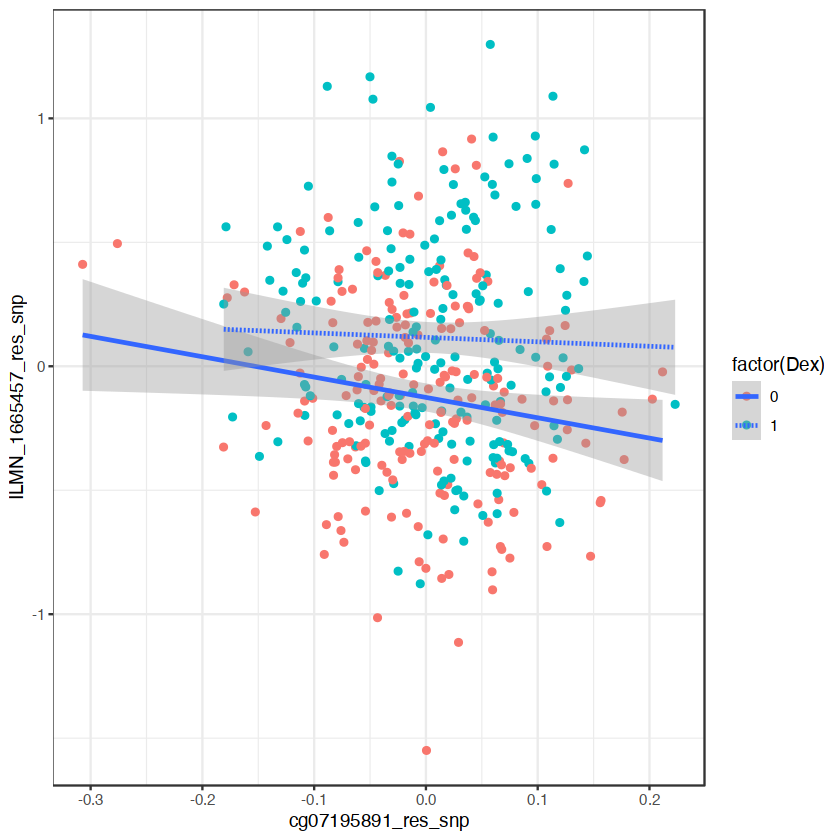

In [49]:
#scatterplot for eQTM adjusted for snp effects
p <- ggplot(plotData, aes( cg07195891_res_snp, ILMN_1665457_res_snp, linetype = factor(Dex)))+theme_bw()
p + geom_point(aes(colour = factor(Dex)))+stat_smooth(method = "lm") 

In [1]:
sessionInfo()

R version 4.2.1 (2022-06-23)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.2/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.4     crayon_1.5.2    digest_0.6.33   utf8_1.2.3     
 [5] IRdisplay_1.1   repr_1.1.6      lifecycle_1.0.3 jsonlite_1.8.7 
 [9] evaluate_0.21   pillar_1.9.0    rlang_1.1.1     cli_3.6.1      
[13] uuid_1.1-0      vctrs_0.6.3     IRkernel_1.3.2  tools_4.2.1    
[17] glue_1.6.2      fastmap_1.1.1   compiler_4.2.1  base64enc_0.1-3
[21] pbdZMQ_0.3-11   htmltools_0.5.5